# 课设题目：著名网游《绝地求生》数据分析
来源：Kaggle
主要分成两部分，一部分是玩家比赛的统计数据，以agg_match_stats开头，一部分是玩家被击杀的数据，以kill_match_stats开头
本次分析选取其中的两个数据集进行分析

分析目标：
1：开局应该猥琐拾物资还是应该刚枪舔包？
2：武器该怎么选择，什么武器更容易杀人？
3：

导入数据，进行清洗

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
agg1 = pd.read_csv('D:\py/agg_match_stats_1.csv')
# 丢弃重复数据
agg1.drop_duplicates(inplace=True)

 1：开局应该猥琐拾物资还是应该刚枪舔包？

In [2]:
# 添加是否成功吃鸡列
agg1['won'] = agg1['team_placement'] == 1
# 添加是否搭乘过车辆列
agg1['drove'] = agg1['player_dist_ride'] != 0

Text(0.5, 1.0, '击杀人数与吃鸡概率的关系')

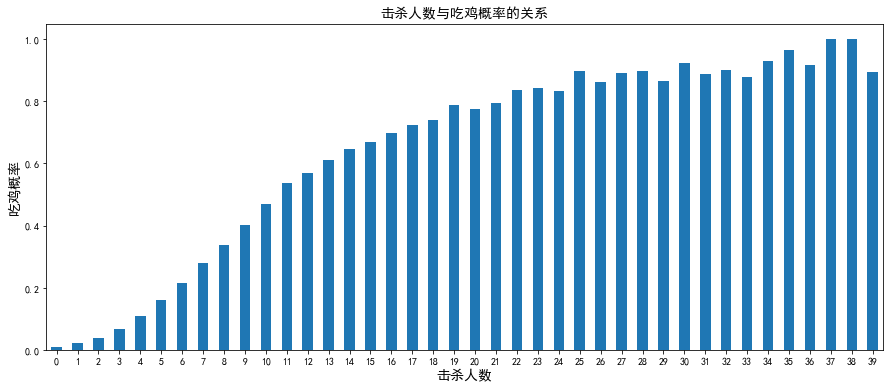

In [5]:
agg1.loc[agg1['player_kills'] < 40, ['player_kills', 'won']].groupby('player_kills').won.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('击杀人数', fontsize=14)
plt.ylabel("吃鸡概率", fontsize=14)
plt.title('击杀人数与吃鸡概率的关系', fontsize=14)

各模式下的平均击杀数： 

In [6]:
agg1.groupby('party_size').player_kills.mean()

party_size
1    0.897479
2    0.897744
4    0.876073
Name: player_kills, dtype: float64

一个人野战猥琐还是团队刚枪

Text(0.5, 1.0, '助攻次数与吃鸡概率的关系')

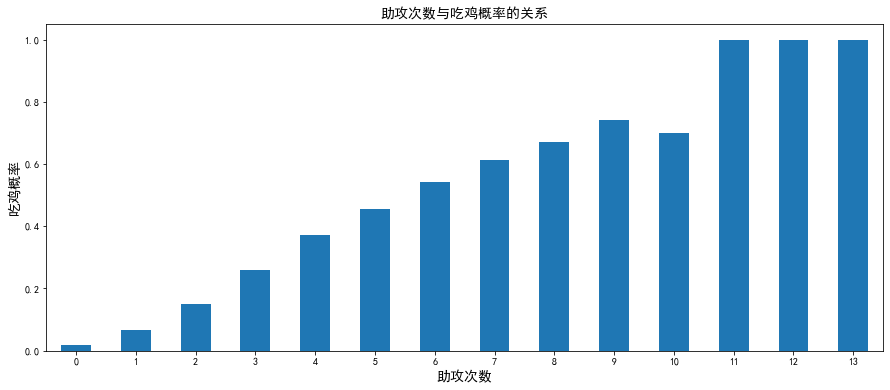

In [7]:
agg1.loc[agg1['party_size']!=1, ['player_assists', 'won']].groupby('player_assists').won.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('助攻次数', fontsize=14)
plt.ylabel("吃鸡概率", fontsize=14)
plt.title('助攻次数与吃鸡概率的关系', fontsize=14)

助攻数越多，吃鸡概率越大，相反，猥琐苟圈吃鸡概率最小

2：武器该怎么选择，什么武器更容易杀人？

In [18]:
death1 = pd.read_csv('D:\py/kill_match_stats_final_1.csv')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'M416'),
  Text(0, 1, 'M16A4'),
  Text(0, 2, 'SCAR-L'),
  Text(0, 3, 'AKM'),
  Text(0, 4, 'UMP9'),
  Text(0, 5, 'S1897'),
  Text(0, 6, 'Mini 14'),
  Text(0, 7, 'Kar98k'),
  Text(0, 8, 'S686'),
  Text(0, 9, 'S12K')])

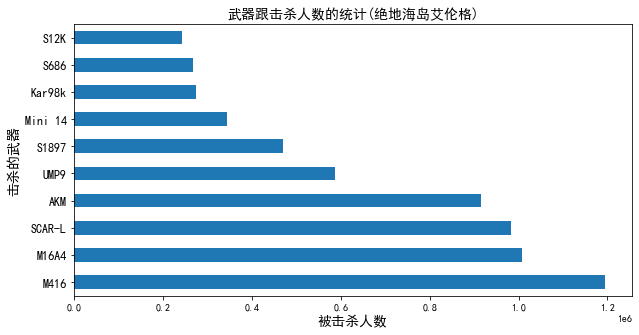

In [23]:
erg_died_of['killed_by'].value_counts()[:10].plot.barh(figsize=(10,5))
plt.xlabel("被击杀人数", fontsize=14)
plt.ylabel("击杀的武器", fontsize=14)
plt.title('武器跟击杀人数的统计(绝地海岛艾伦格)', fontsize=14)
plt.yticks(fontsize=12)

远处狙击，适合的武器

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'M416'),
  Text(0, 1, 'SCAR-L'),
  Text(0, 2, 'M16A4'),
  Text(0, 3, 'AKM'),
  Text(0, 4, 'UMP9'),
  Text(0, 5, 'S1897'),
  Text(0, 6, 'Kar98k'),
  Text(0, 7, 'SKS'),
  Text(0, 8, 'Mini 14'),
  Text(0, 9, 'S686')])

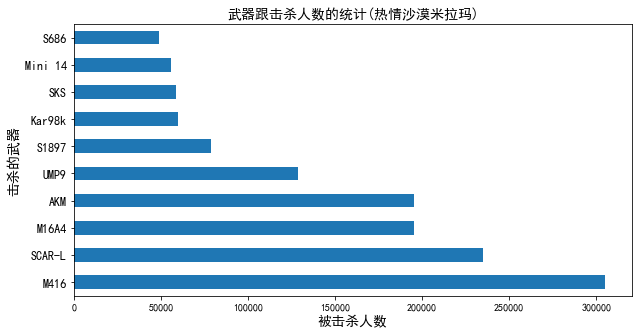

In [24]:
mrm_died_of['killed_by'].value_counts()[:10].plot.barh(figsize=(10,5))
plt.xlabel("被击杀人数", fontsize=14)
plt.ylabel("击杀的武器", fontsize=14)
plt.title('武器跟击杀人数的统计(热情沙漠米拉玛)', fontsize=14)
plt.yticks(fontsize=12)

无论在哪个地图，M416都是杀人最多的武器

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

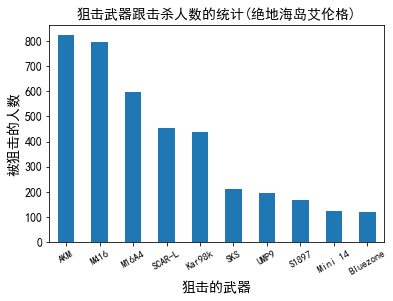

In [28]:
erg_died_of.loc[(erg_distance > 800)&(erg_distance < 1500), 'killed_by'].value_counts()[:10].plot.bar(rot=30)
plt.xlabel("狙击的武器", fontsize=14)
plt.ylabel("被狙击的人数", fontsize=14)
plt.title('狙击武器跟击杀人数的统计(绝地海岛艾伦格)', fontsize=14)
plt.yticks(fontsize=12)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

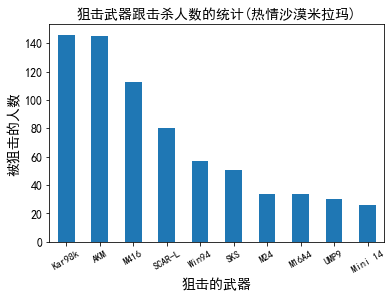

In [29]:
mrm_died_of.loc[(mrm_distance > 800)&(mrm_distance < 1000), 'killed_by'].value_counts()[:10].plot.bar(rot=30)
plt.xlabel("狙击的武器", fontsize=14)
plt.ylabel("被狙击的人数", fontsize=14)
plt.title('狙击武器跟击杀人数的统计(热情沙漠米拉玛)', fontsize=14)
plt.yticks(fontsize=12)

近距离作战适合用什么武器

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

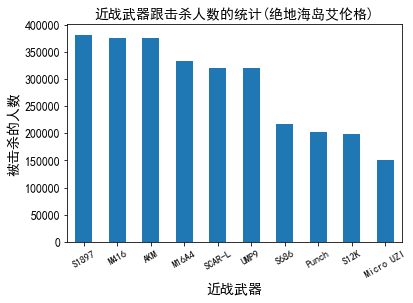

In [30]:
erg_died_of.loc[erg_distance<10, 'killed_by'].value_counts()[:10].plot.bar(rot=30)
plt.xlabel("近战武器", fontsize=14)
plt.ylabel("被击杀的人数", fontsize=14)
plt.title('近战武器跟击杀人数的统计(绝地海岛艾伦格)', fontsize=14)
plt.yticks(fontsize=12)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

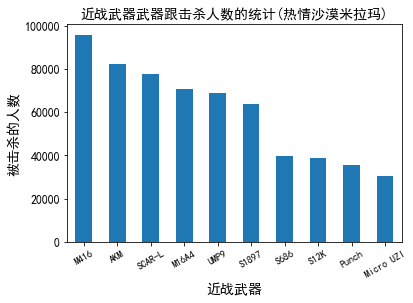

In [31]:
mrm_died_of.loc[mrm_distance<10, 'killed_by'].value_counts()[:10].plot.bar(rot=30)
plt.xlabel("近战武器", fontsize=14)
plt.ylabel("被击杀的人数", fontsize=14)
plt.title('近战武器武器跟击杀人数的统计(热情沙漠米拉玛)', fontsize=14)
plt.yticks(fontsize=12)